# Koneoppiminen: Osa 2: k-means

In [ ]:
# Kirjoita tähän tietosi!
student_name = 'Tiina Jokela'

## Tehtävä 1
### Aihe: Siemenaineiston esikäsittely

2 pistettä

Tutustu aineistoon *seeds* osoitteessa https://archive.ics.uci.edu/ml/datasets/seeds .

1. Lue aineisto Pandas-kirjaston DataFrameen.

2. Muista asettaa sarakkeiden nimet aineiston dokumentaation mukaisesti. 

Vinkki: jos tabulaattorit erottimina tuottavat ongelmia, `delim_whitespace=True` auttaa. Se tekee kaikista tyhjistä merkeistä datakenttien erottimia.

In [2]:
# Kirjoita toteutuksesi tähän soluun. Tallenna vastauksesi df-muuttujaan.
import pandas as pd

columns = ["area A", "perimeter P", "compactness C=4*pi*A/P^2", "length of kernel", "width of kernel",
          "asymmetry coefficient", "length of kernel groove", "variety"]
df = pd.read_table('seeds_dataset.txt', delim_whitespace=True, names=columns) 

In [10]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['area A', 'perimeter P', 'compactness C=4*pi*A/P^2', 'length of kernel',
       'width of kernel', 'asymmetry coefficient', 'length of kernel groove',
       'variety'],
      dtype='object')
First row by position: area A                      15.260
perimeter P                 14.840
compactness C=4*pi*A/P^2     0.871
length of kernel             5.763
width of kernel              3.312
asymmetry coefficient        2.221
length of kernel groove      5.220
variety                      1.000
Name: 0, dtype: float64


## Tehtävä 2
### Aihe: Visualisointi

2 pistettä

Katsotaan näkyykö datassa ryhmittelyjä eri muuttujien suhteen.

Visualisoi aineisto käyttäen Seabornin [pairplot](https://seaborn.pydata.org/examples/scatterplot_matrix.html) -funktiota (tunnetaan myös nimellä scatterplot matrix). 

In [7]:
# Kirjoita toteutuksesi tähän soluun. 
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.pairplot(df, hue='variety')
plt.close("all")

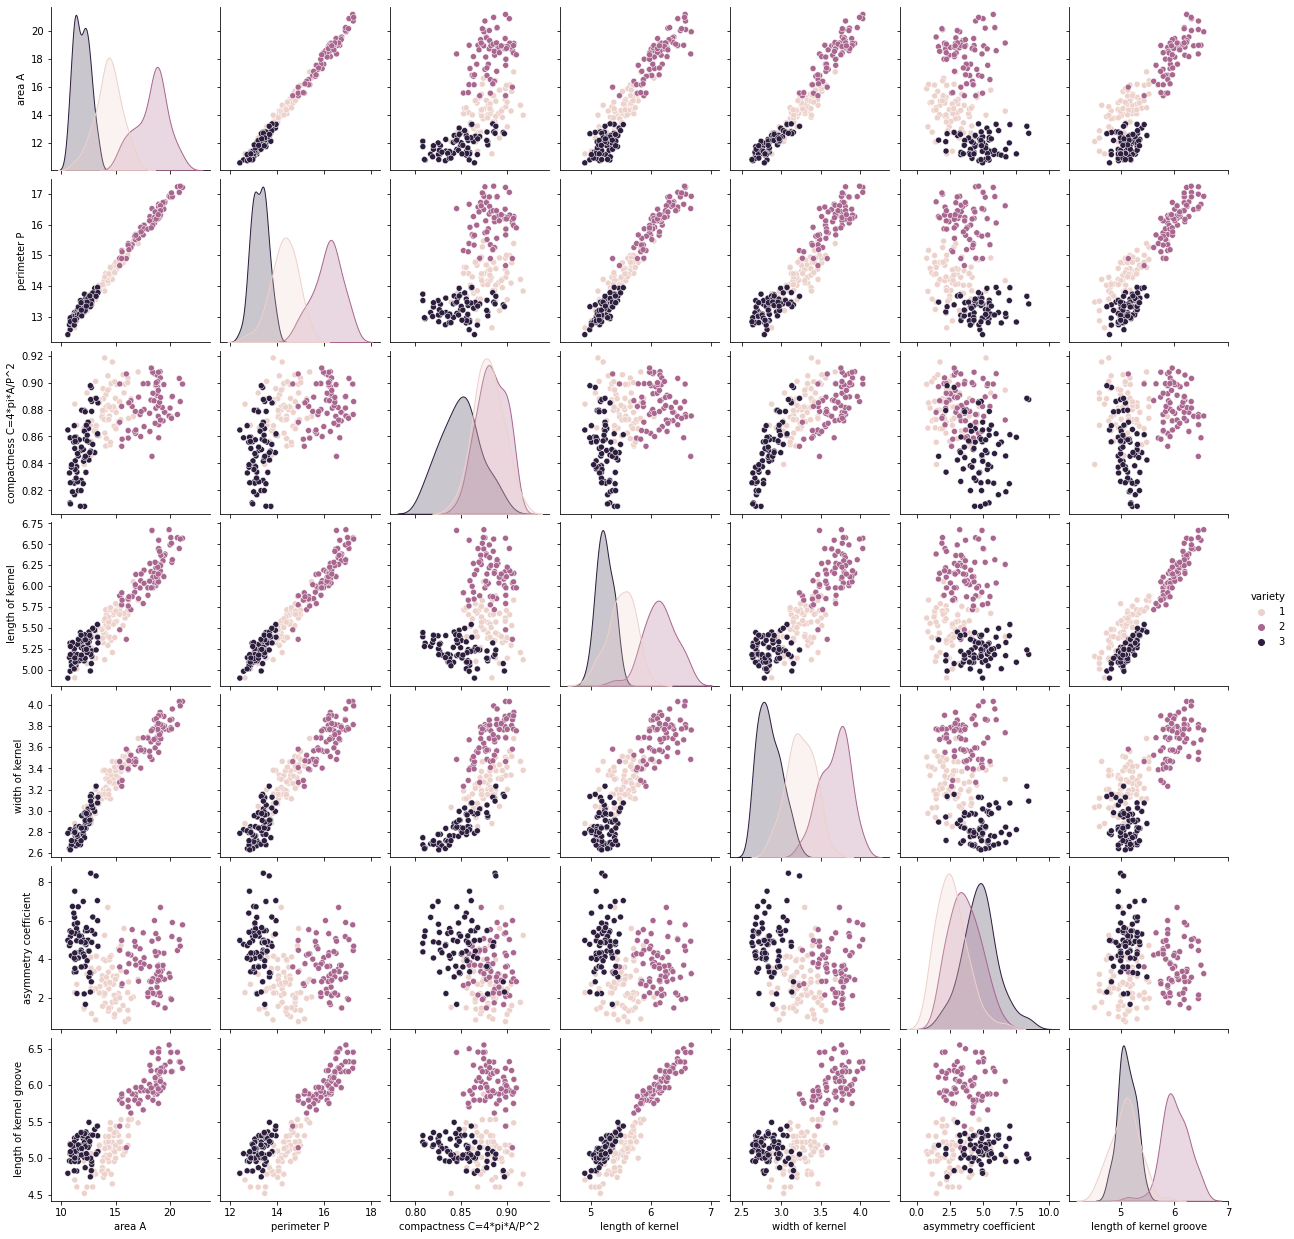

In [8]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva. 
ax.fig

## Tehtävä 3
### Aihe: k-means

6 pistettä

1. Suorita klusterointi aineistolle käyttäen `scikit-learn`-kirjaston `cluster`-moduulin [k-means-menetelmää](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html). 

HUOM! Älä sisällytä luokkamuuttujaa klusterointiin. 

2. Visualisoi jälleen klusterit käyttäen Seabornin `pairplot` -funktiota. 

Tallenna klusteroinnin tulokset DataFramen `df` sarakkeeseen `cluster`.

Vinkki: Tiedetään, että aineistossa on mitattu kolmea erilaista kasvia. 

Vinkki: `pairplot`-funktiossa on `hue`-parametri värin asettamiseen.

In [10]:
# Kirjoita toteutuksesi tähän soluun. Tallenna vastauksesi df-muuttujaan.
from sklearn.cluster import KMeans

X = df.drop('variety', axis=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

df['cluster'] = labels
ax = sns.pairplot(df, hue ='cluster') 
plt.close("all")

Clusters: 0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: cluster, Length: 210, dtype: int32


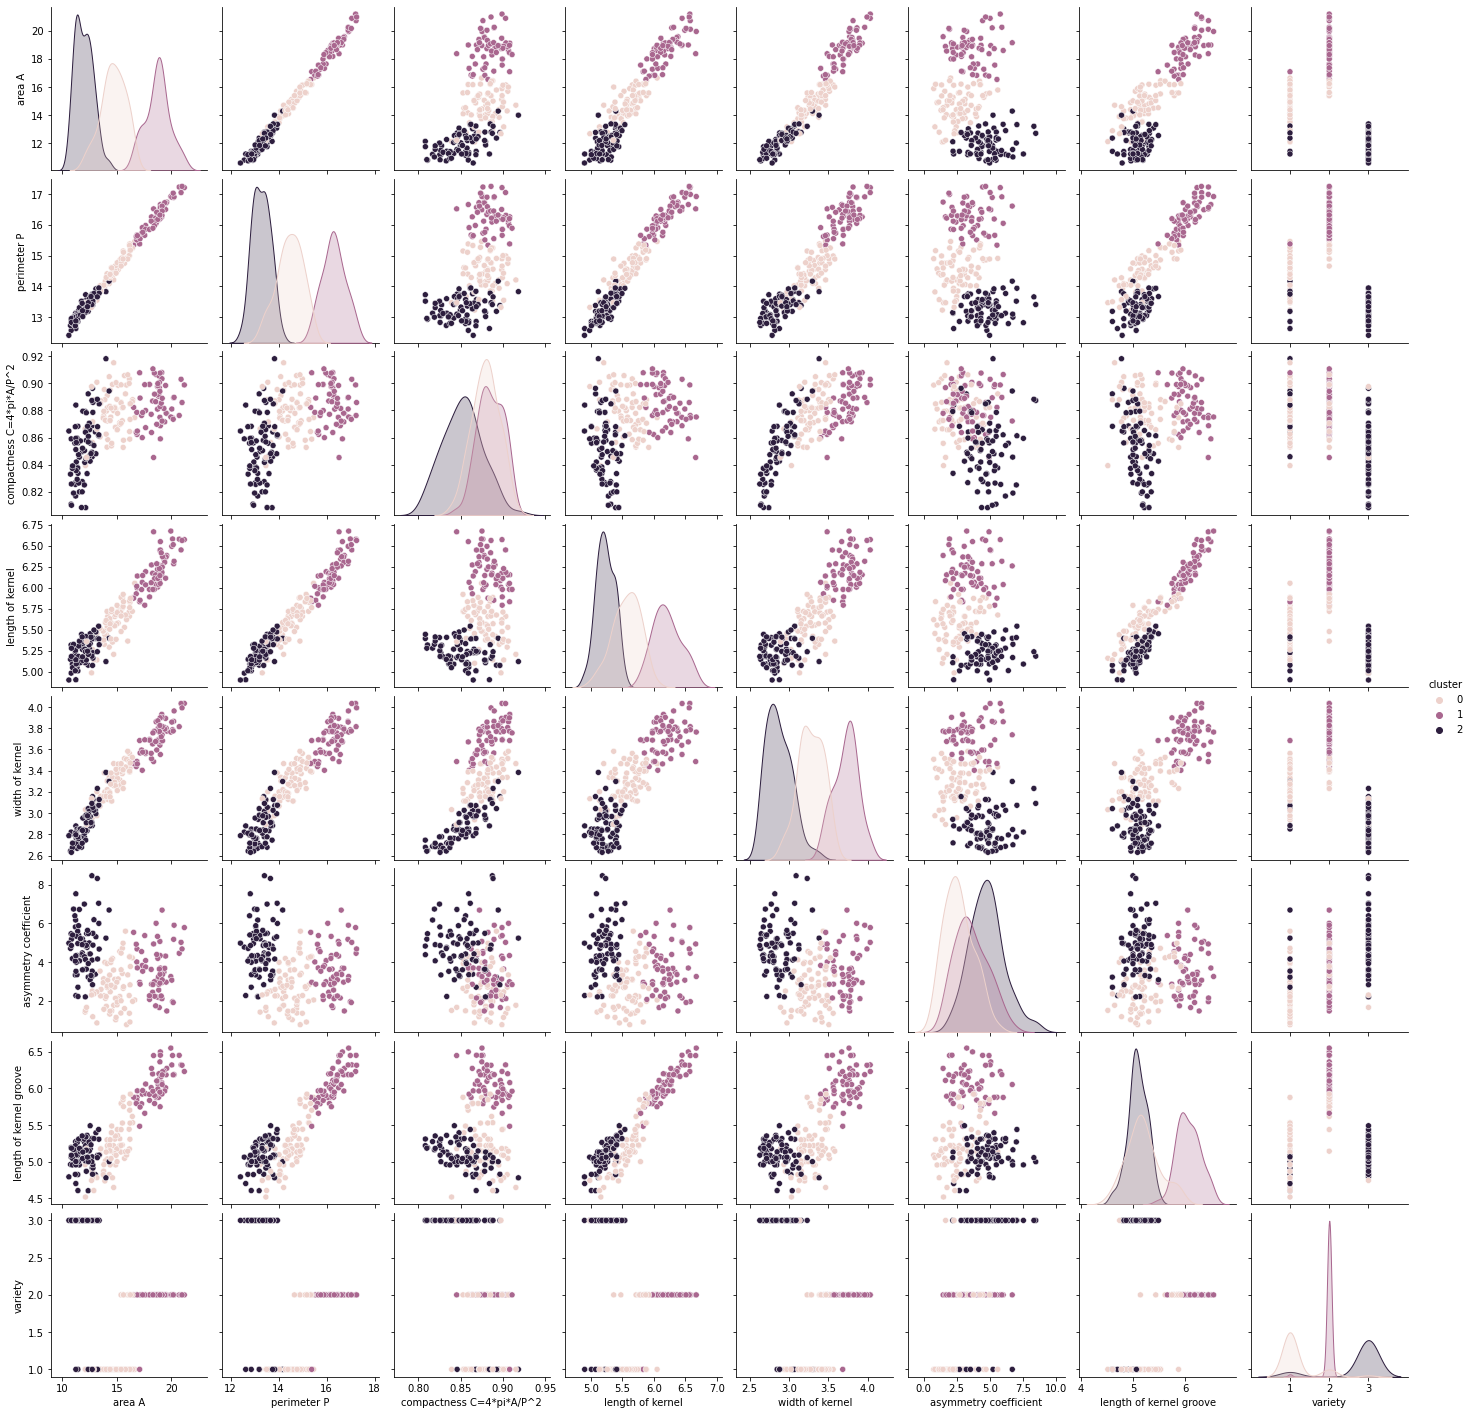

In [11]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna klusteroinnnin tarkkuus acc-muuttujaan.
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva.
print(f'Clusters: {df["cluster"]}')
ax.fig